# First Test

In [ ]:
import infrared as ir

num_colors = 3
num_nodes = 5
edges = [(1,2),(1,3),(1,4),(2,3),(2,5),(4,5)]

## Set up the model

In [ ]:
model = ir.Model()

# dummy variable to avoid index transformations
model.add_variables(1,(0,0))

# add one variable per node
model.add_variables(num_nodes,num_colors)

# define NotEquals constraints in Python
ir.def_constraint_class('NotEquals',
    lambda i,j: [i,j], # signature and dependencies
    lambda x, y: x!=y)  # constraint semantics

# add one inequality constraint per edge 
model.add_constraints(NotEquals(i,j) for i,j in edges)

solver = ir.Optimizer(model)
print(f'Tree width: {solver.treewidth()}')

## Draw the dependency graph

In [ ]:
from IPython.display import Image
import re

# Plot dependency graph
filename = 'dependency_graph.dot'
model.write_graph(filename, True)

ir.dotfile_to_png(filename)
filename = re.sub(r"dot$","png",filename)

Image(filename=filename)

## Plot the tree decomposition

In [ ]:
filename="treedecomp"
solver.plot_td(filename,'png')
Image(filename=filename+".png")

## Generate colorings

In [ ]:
def assignment_to_coloring(a):
        colors=["red","green","blue"]
        coloring = {i:colors[v] for i,v in enumerate(a.values())}
        del coloring[0]
        return coloring

In [ ]:
def plot_coloring(coloring, filename):
    import graphviz

    G = graphviz.Graph('coloring', engine="fdp")

    for i in range(1,num_nodes+1):
        G.node(f'{i}', style="filled", color=coloring[i])
    for i,j in edges:
        G.edge(f'{i}',f'{j}')

    G.render(filename, format='png', cleanup=True)

## Sampling

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
 
solver = ir.Sampler(model)

### Existing sampling method

In [ ]:
for _ in range(20):
    assignment = solver.sample_new()
    coloring = assignment_to_coloring(assignment)
    print('Sampled coloring:', coloring)

### Naive non-redundant sampling method

In [ ]:
for _ in range(20):
    assignment = solver.sample_new(non_redundant=True, non_redundant_mode="rejection", repeats=1000)
    if assignment:
        coloring = assignment_to_coloring(assignment)
        print('Sampled coloring:', coloring)

### Non-redundant sampling

Sampled coloring: {1: 'green', 2: 'blue', 3: 'red', 4: 'red', 5: 'green'}


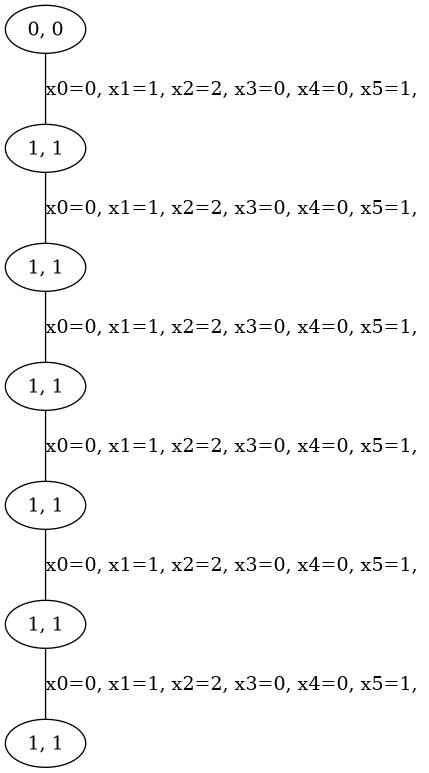

Sampled coloring: {1: 'blue', 2: 'green', 3: 'red', 4: 'green', 5: 'red'}


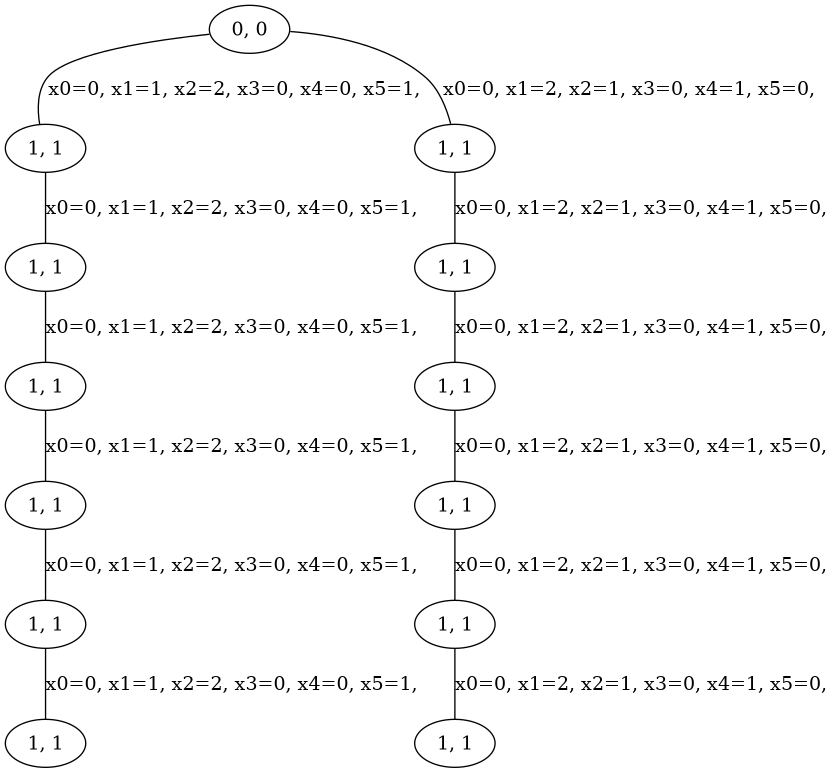

No new sample found!
Sampled coloring: {1: 'green', 2: 'red', 3: 'blue', 4: 'red', 5: 'blue'}


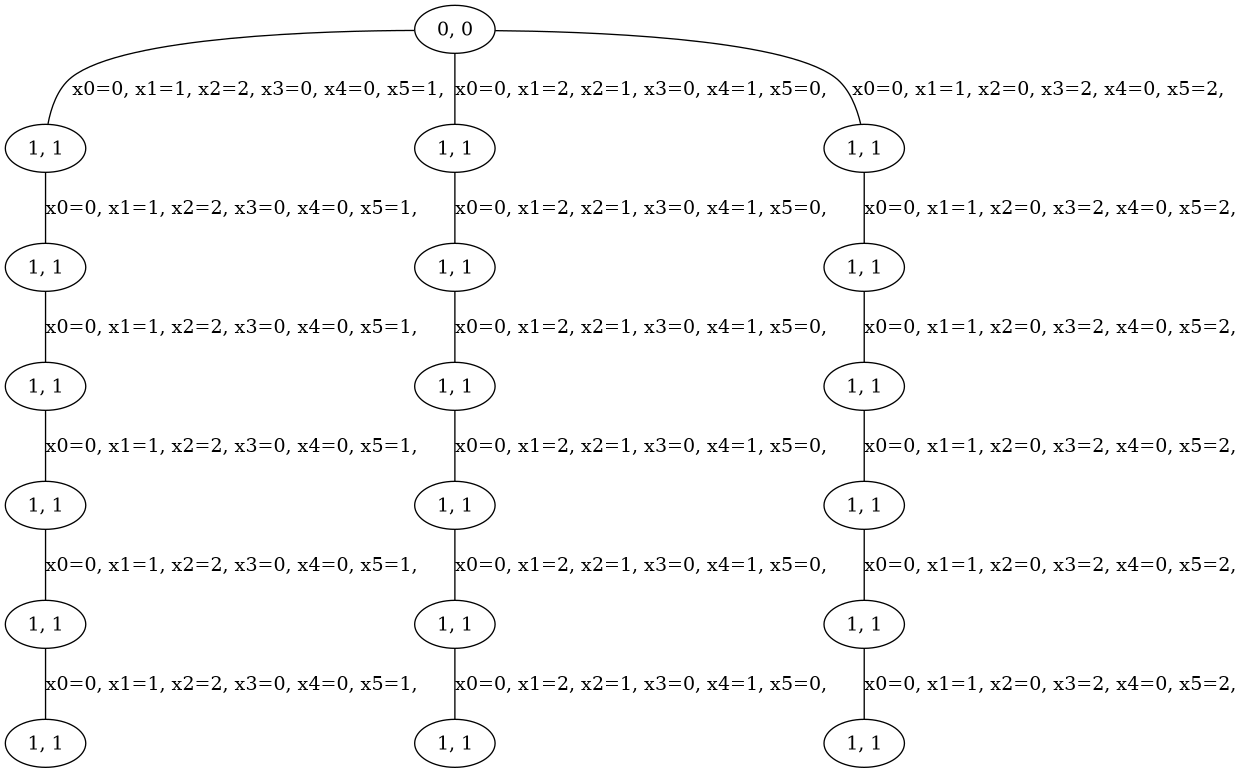

No new sample found!
No new sample found!
Sampled coloring: {1: 'green', 2: 'red', 3: 'blue', 4: 'blue', 5: 'green'}


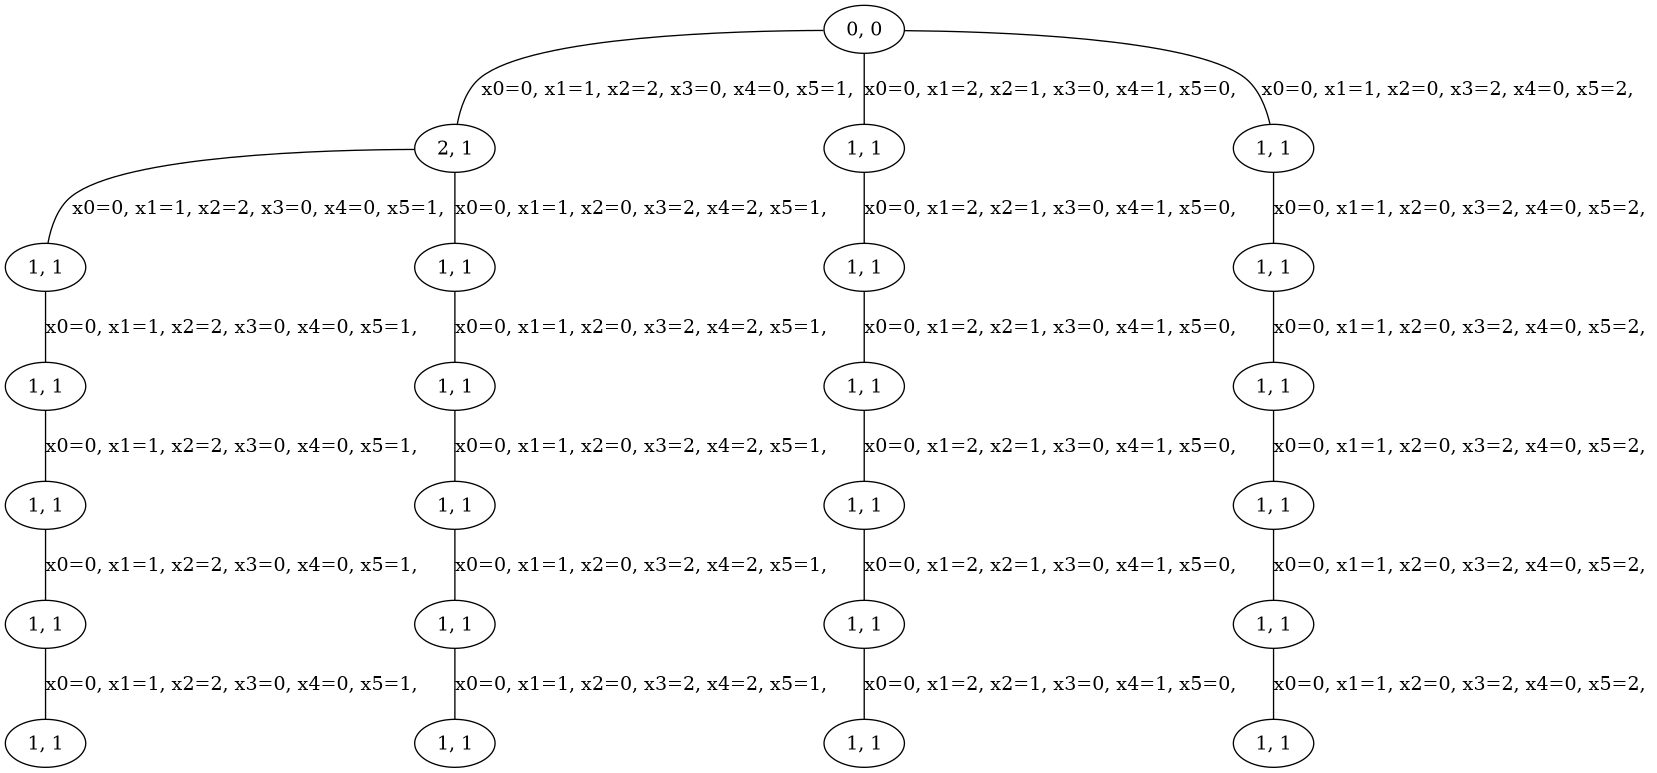

Sampled coloring: {1: 'green', 2: 'blue', 3: 'red', 4: 'blue', 5: 'red'}


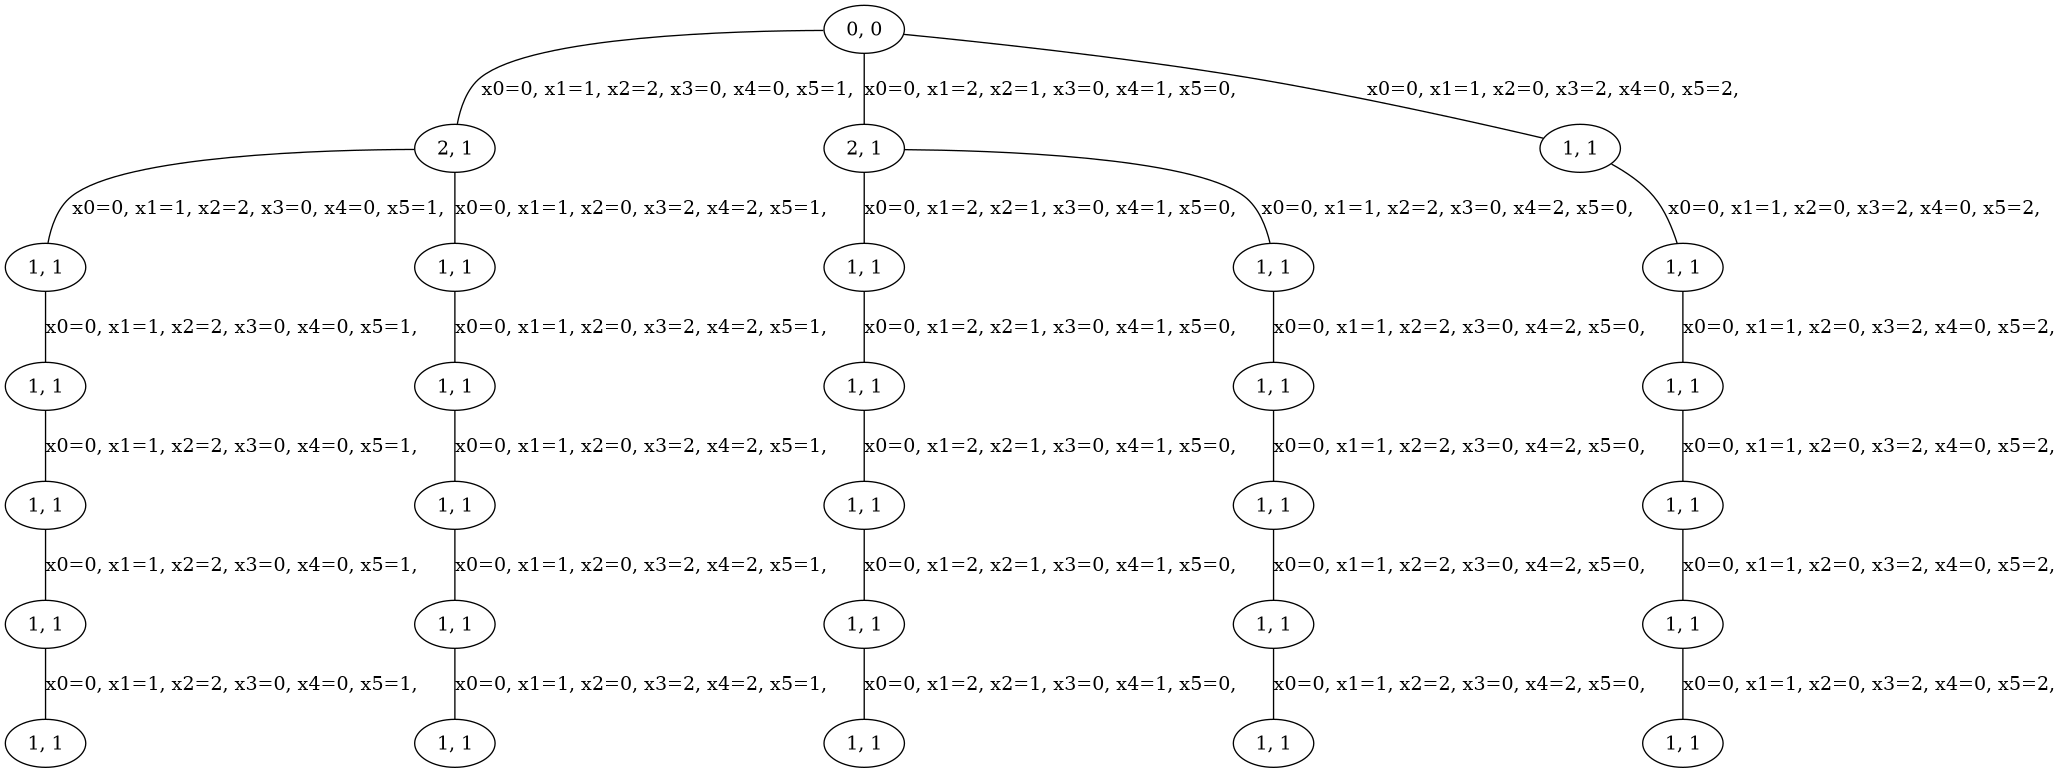

Sampled coloring: {1: 'green', 2: 'red', 3: 'blue', 4: 'red', 5: 'green'}


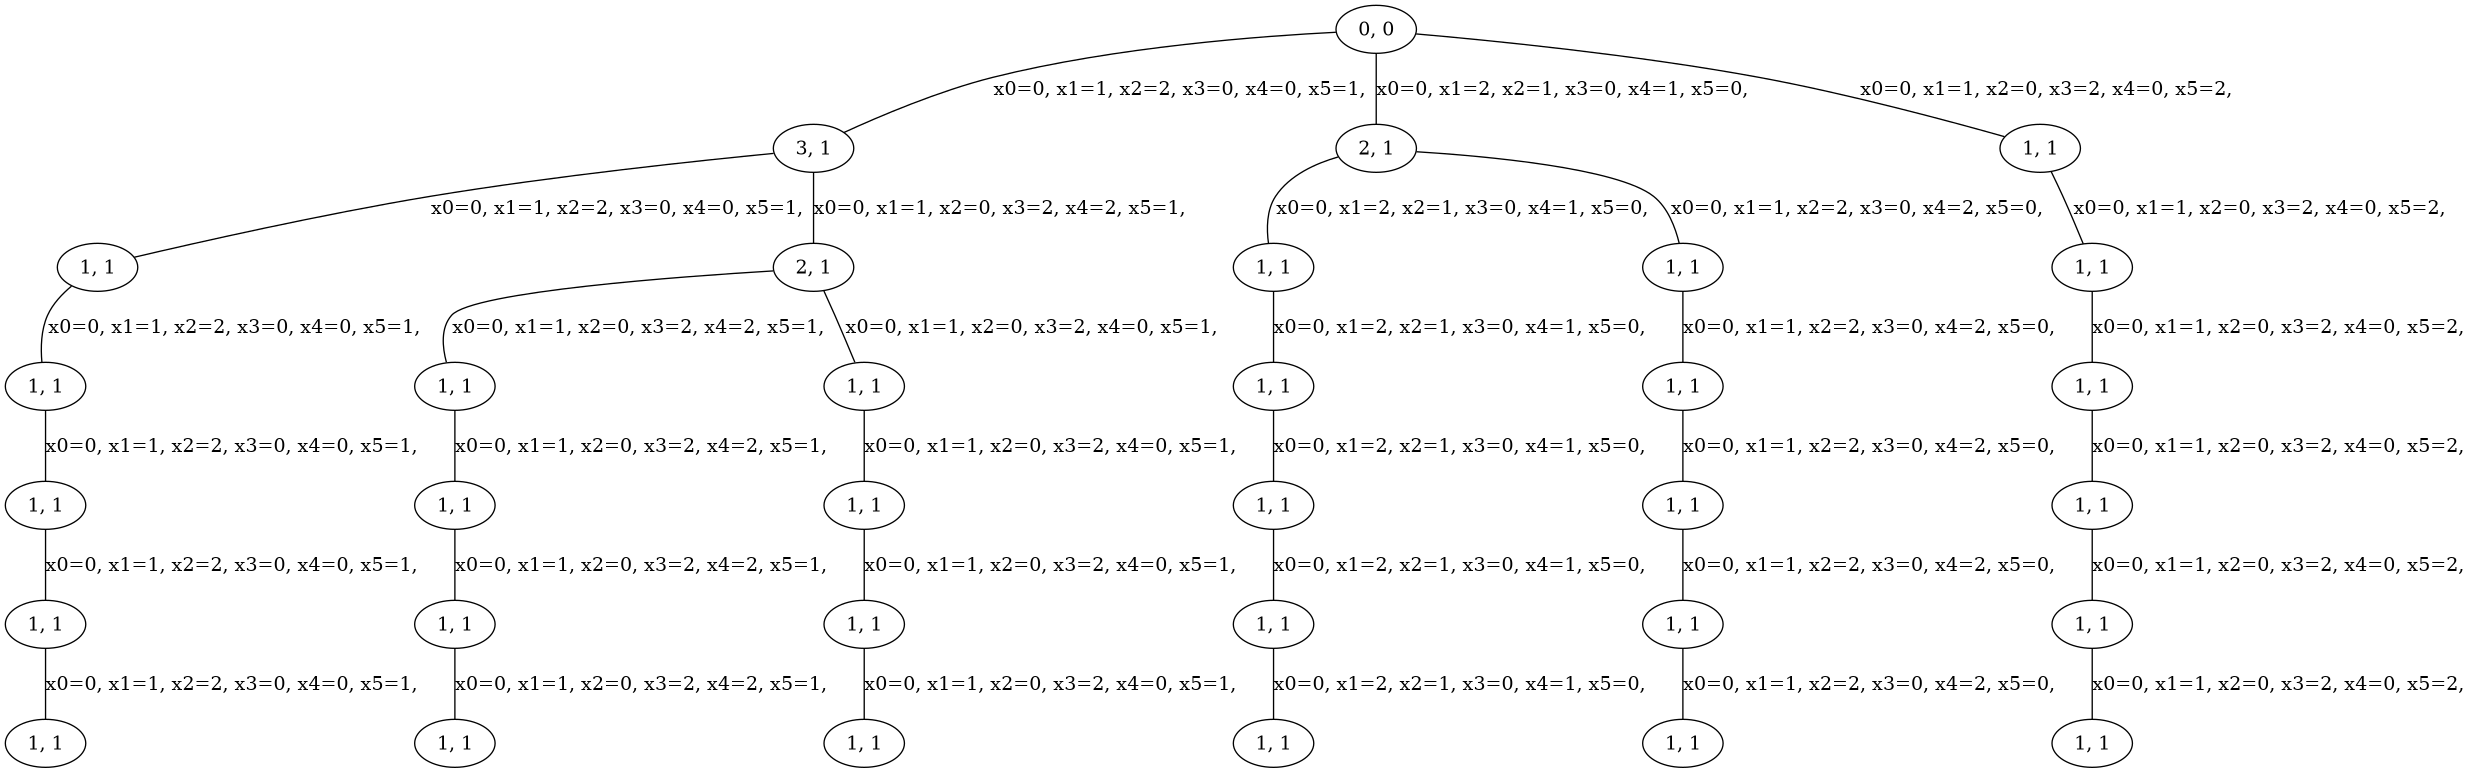

No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!
No new sample found!


In [9]:
import subprocess
from IPython.display import display, Image

count = 0
for _ in range(20):
    assignment = solver.sample_new(non_redundant=True)
    if assignment:
        coloring = assignment_to_coloring(assignment)
        print('Sampled coloring:', coloring)
        png_data = subprocess.check_output(["dot", "-Tpng", f'weights_graph_{count}.dot'])
        count += 1
        display(Image(data=png_data))